### Assignment : Desicion Tree on heart.csv

### Task 1: Data Preparation :

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np


In [4]:
# Load dataset
df = pd.read_csv('heart.csv')


# Display first few rows of the dataset
print(df.head())



   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  FALSE      2.3  downsloping  fixed defect    0  
1  FALSE      0.0         flat  fixed defect    0  
2  FALSE      0.4         flat  fixed defect    0  
3  FALSE      0.0         flat  fixed defect    0  
4   TRUE      1.5         flat  fixed defect    0  


In [5]:

# Check dataset shape
print("Dataset Shape:", df.shape)


Dataset Shape: (908, 13)


In [6]:
# Check column names
print("Column Names:")
print(df.columns)


Column Names:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')


In [7]:
# Check data types
print("Data Types:")
print(df.dtypes)


Data Types:
age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object


In [8]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [9]:
# Replace missing values with mean for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())


# Replace missing values with mode for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode().iloc[0])


In [10]:

# Check for missing values again
print("Missing Values After Handling:")
print(df.isnull().sum())

Missing Values After Handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


### Task 2 : Exploratory Data Analysis (EDA):

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Check for outliers
print("Outliers:")
print(df.describe())


Outliers:
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  908.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.055826    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.800000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


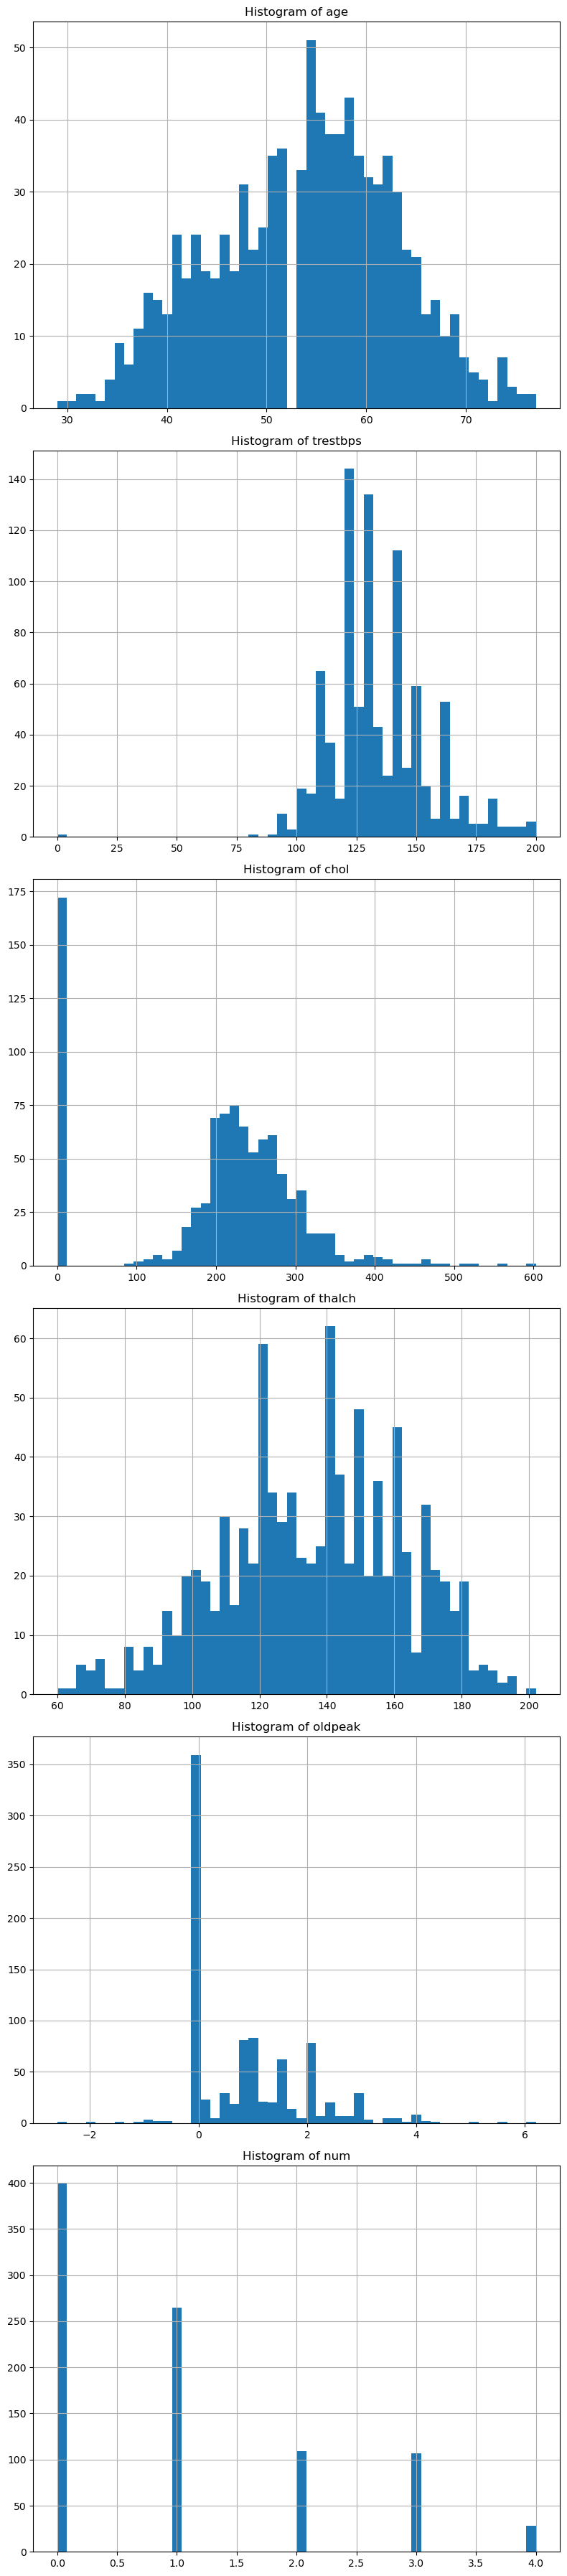

In [13]:
# Visualize distribution of features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


## Histograms
fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(8, 6*len(numerical_cols)))
for i, col in enumerate(numerical_cols):
    df[col].hist(ax=axes[i], bins=50)
    axes[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()




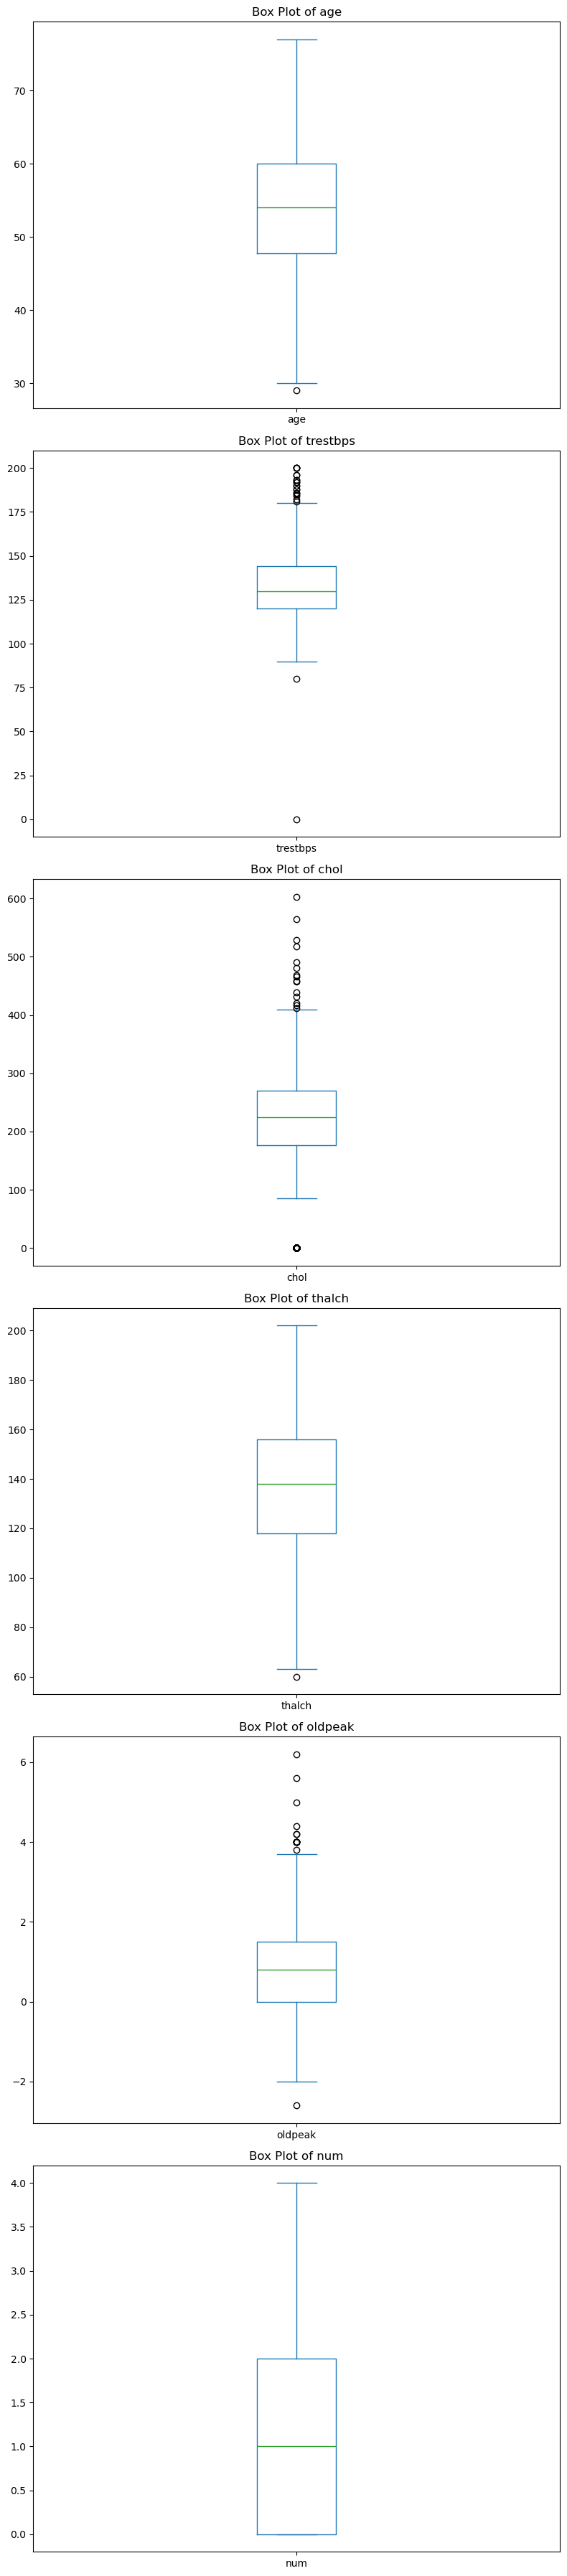

In [14]:
## Box Plots
fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(8, 6*len(numerical_cols)))
for i, col in enumerate(numerical_cols):
    df[col].plot.box(ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()




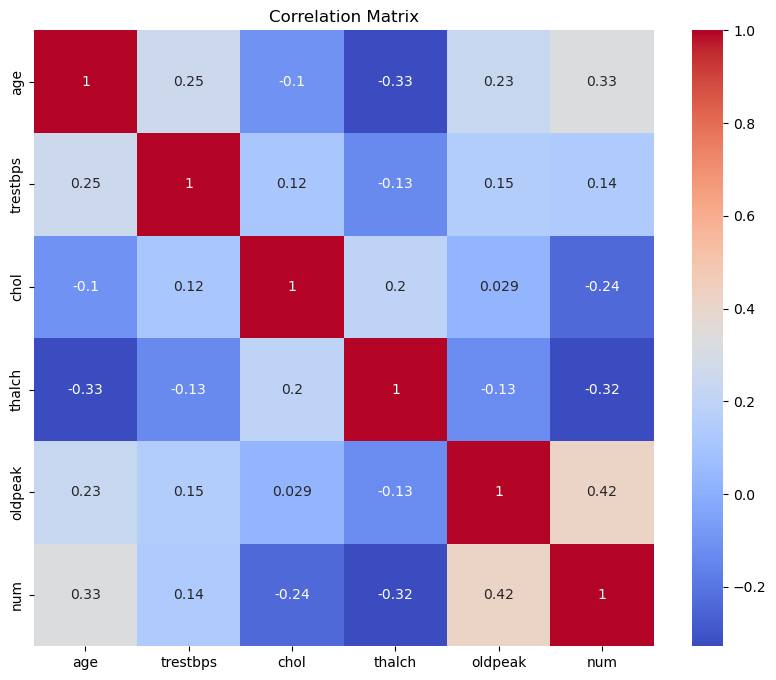

In [15]:
## Correlation Matrix
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



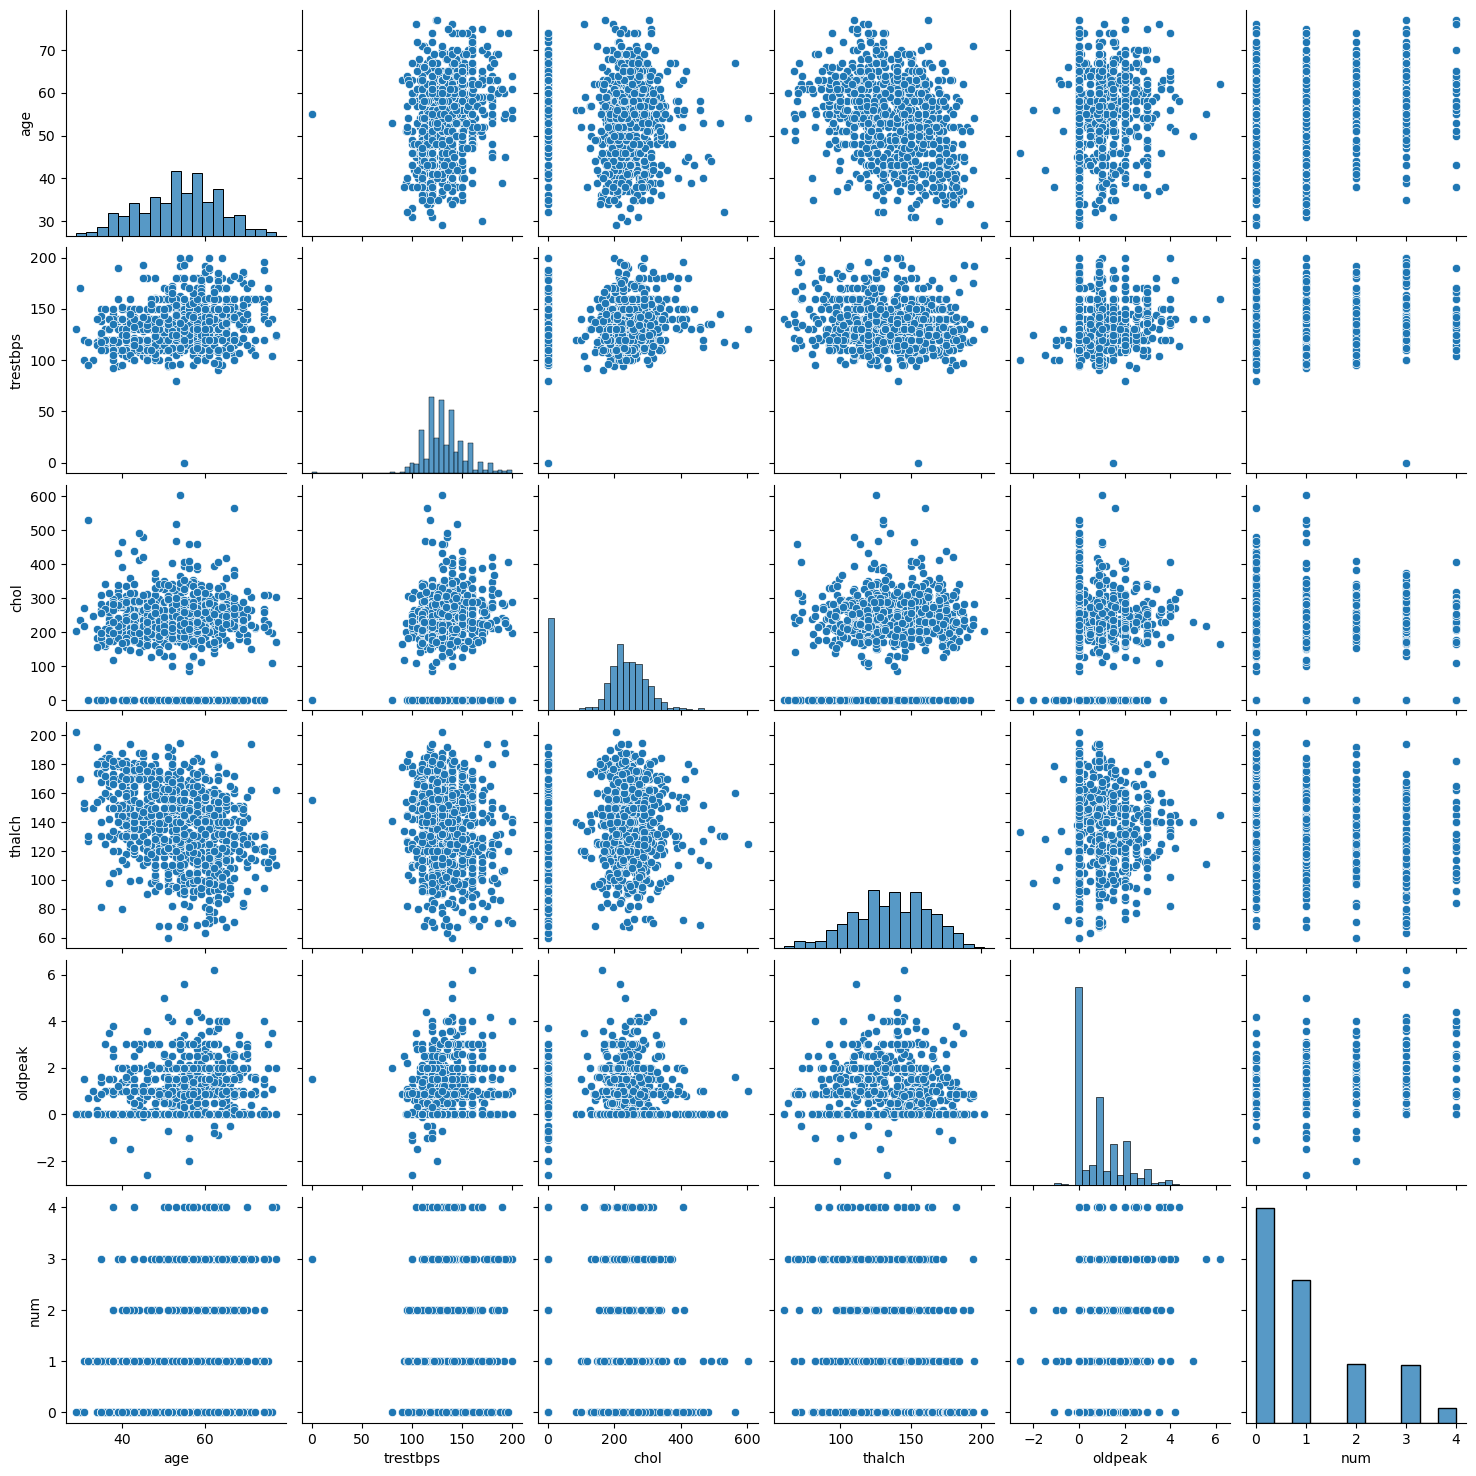

In [16]:

## Pairplot
sns.pairplot(df[numerical_cols], height=2.5)
plt.show()



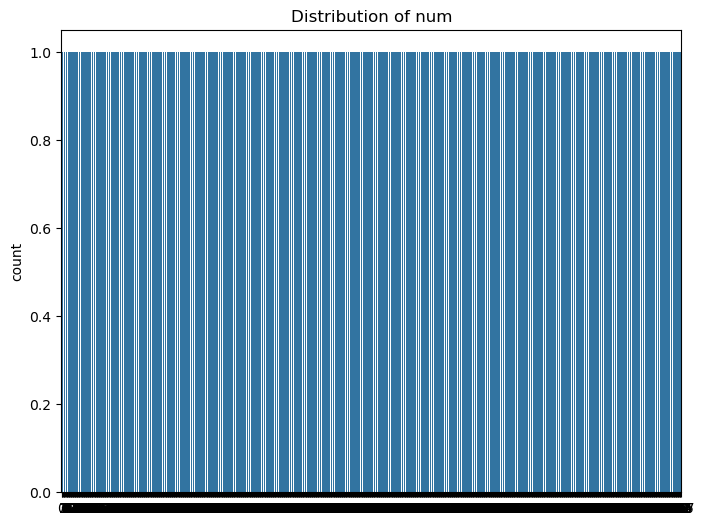

In [17]:

## Distribution of target variable
target_column = 'num'
plt.figure(figsize=(8, 6))
sns.countplot(df[target_column])
plt.title(f'Distribution of {target_column}')
plt.show()

### Task 3 : Data Featuring : 

In [19]:
# Import necessary libraries

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer





In [20]:
# Define categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns




In [21]:
# Encoding categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


# Scaling numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



In [22]:

# Define preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols)])




In [23]:
# Fit and transform data
df_num = preprocessor.fit_transform(df)


# Combine numerical and categorical data
df = np.concatenate((df_num, df[categorical_cols].values), axis=1)


# Convert transformed data back to DataFrame
df = pd.DataFrame(df)


# Check data types
print("Data Types:")
print(df.dtypes)




Data Types:
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
dtype: object


In [24]:
# Check scaled features
print("Scaled Features:")
print(df.describe())


Scaled Features:
                 0             1             2           3           4   \
count  9.080000e+02  9.080000e+02  9.080000e+02  908.000000  908.000000   
mean  -1.565072e-17  3.130144e-17  6.260288e-17    0.000000    0.000000   
std    1.000551e+00  1.000551e+00  1.000551e+00    1.000551    1.000551   
min   -2.708608e+00 -6.543805e+00 -1.798388e+00   -2.835259   -3.308478   
25%   -6.600961e-01 -6.586745e-01 -2.207731e-01   -0.670285   -0.844594   
50%    2.274119e-02 -1.682469e-01  2.009656e-01    0.076258   -0.086476   
75%    6.782649e-01  5.183517e-01  6.115471e-01    0.748146    0.576878   
max    2.535582e+00  3.264746e+00  3.583801e+00    2.465194    5.030822   

                 5           6           7           8           9   \
count  9.080000e+02  908.000000  908.000000  908.000000  908.000000   
mean   6.260288e-17    0.790749    0.777533    0.991189    0.450441   
std    1.000551e+00    0.406998    0.958374    0.635177    0.572013   
min   -8.819769e-01    

### Task 4 :Decision Tree Classification:

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


# Load dataset
df = pd.read_csv('heart.csv')


# Convert target variable to categorical (disease presence: 0-4)
df['num'] = pd.cut(df['num'], bins=[-1, 0, 1, 2, 3, 4], labels=[0, 1, 2, 3, 4], include_lowest=True)




In [27]:
# Separate numerical and categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


# Handle missing values
for col in numerical_cols:
    df.loc[:, col] = df.loc[:, col].fillna(df.loc[:, col].mean())
    
for col in categorical_cols:
    df.loc[:, col] = df.loc[:, col].fillna(df.loc[:, col].mode()[0])




In [28]:
# Encoding categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df.loc[:, col] = le.fit_transform(df.loc[:, col])


# Scaling numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])




In [29]:
# Define feature and target columns
X = df.drop('num', axis=1)
y = df['num']


# Check shape and dimensions
print("X Shape:", X.shape)
print("y Shape:", y.shape)




X Shape: (908, 12)
y Shape: (908,)


In [30]:
# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Verify data types
print("X_train dtype:", X_train.dtypes)
print("y_train dtype:", y_train.dtype)




X_train dtype: age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
thal         object
dtype: object
y_train dtype: category


In [31]:
# Implement Decision Tree Classification model
clf = DecisionTreeClassifier(random_state=42)


# Train the model on the training set
clf.fit(X_train, y_train)


# Make predictions on the testing set
y_pred = clf.predict(X_test)


# Evaluate model performance
print("Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Evaluation Metrics:
Accuracy: 0.4945054945054945
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        89
           1       0.31      0.35      0.33        48
           2       0.32      0.41      0.36        22
           3       0.15      0.12      0.13        17
           4       0.00      0.00      0.00         6

    accuracy                           0.49       182
   macro avg       0.31      0.32      0.31       182
weighted avg       0.50      0.49      0.49       182



In [32]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[62 18  5  4  0]
 [16 17  9  6  0]
 [ 4  7  9  1  1]
 [ 2  9  2  2  2]
 [ 0  3  3  0  0]]


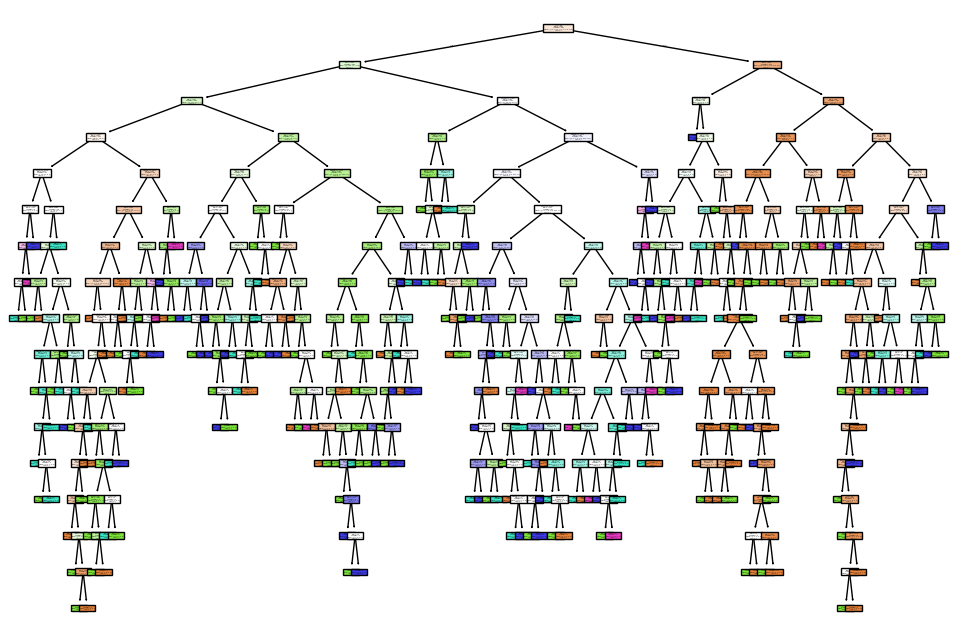

In [33]:

# Visualize decision tree
class_names = [str(i) for i in np.unique(y)]
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

### Task 5 Hyperparameter Tuning:

In [35]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


# Define hyperparameter tuning space
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}




In [36]:
# Initialize Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)


# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


# Print best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Score: 0.5358620689655172


In [37]:

# Train a new Decision Tree model with best hyperparameters and evaluate on test set
best_clf = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
best_clf.fit(X_train, y_train)
y_pred_best = best_clf.predict(X_test)


# Evaluate best model performance
print("Best Model Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_best))





Best Model Evaluation Metrics:
Accuracy: 0.5824175824175825
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        89
           1       0.47      0.52      0.50        48
           2       0.26      0.23      0.24        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.58       182
   macro avg       0.29      0.32      0.30       182
weighted avg       0.51      0.58      0.54       182



In [38]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

Confusion Matrix:
[[76  9  4  0  0]
 [18 25  4  1  0]
 [ 3 12  5  2  0]
 [ 8  4  5  0  0]
 [ 1  3  1  1  0]]


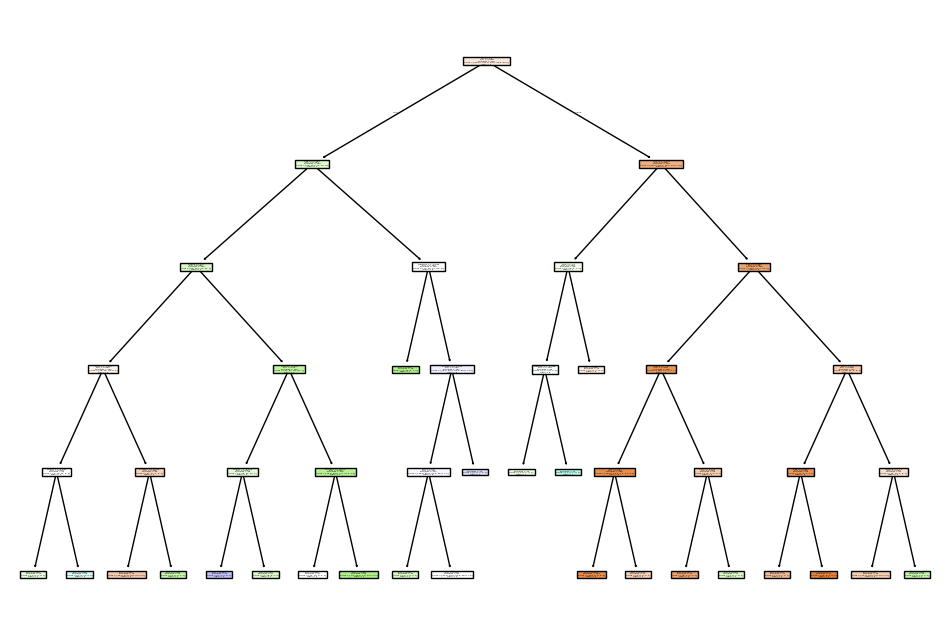

In [39]:
# Visualize best decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()


### Task 6 : Model Evaluation and Analysis:

In [41]:
# Evaluate model performance
print("Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_best))





Evaluation Metrics:
Accuracy: 0.5824175824175825
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        89
           1       0.47      0.52      0.50        48
           2       0.26      0.23      0.24        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.58       182
   macro avg       0.29      0.32      0.30       182
weighted avg       0.51      0.58      0.54       182



In [42]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

Confusion Matrix:
[[76  9  4  0  0]
 [18 25  4  1  0]
 [ 3 12  5  2  0]
 [ 8  4  5  0  0]
 [ 1  3  1  1  0]]


In [43]:
# Calculate additional metrics
precision = classification_report(y_test, y_pred_best, output_dict=True)['weighted avg']['precision']
recall = classification_report(y_test, y_pred_best, output_dict=True)['weighted avg']['recall']
f1_score = classification_report(y_test, y_pred_best, output_dict=True)['weighted avg']['f1-score']
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)



Precision: 0.5068258454554382
Recall: 0.5824175824175825
F1-score: 0.5412230157720842


In [44]:

# ROC-AUC score (for multi-class classification)
from sklearn.metrics import roc_auc_score
y_pred_proba = best_clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("ROC-AUC score:", roc_auc)

ROC-AUC score: 0.7366348784966515
